In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import openpyxl 
import os

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind as ttest
from sklearn.metrics import mean_squared_error
import time

In [3]:
from load_data import load_processed_general_data
from load_data import load_processed_society_data
from load_data import load_processed_quality_of_life_data

In [4]:
median_houses_2020,lower_quatile_houses_2020,A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,local_authority_names = load_processed_general_data()
worksheet,lower_quatile_earning_2020,ratio_by_lower_quatile_2020,median_earning_2020,ratio_by_medians_2020,month_rent_higher_quatile,month_rent_lower_quatile,total_threaten_homeless,violence_crime_ratio,sexual_crime_ratio,robbery_crime_ratio,theft_crime_ratio,damage_arson_crime_ratio,drug_crime_ratio,other_crime_ratio,total_households_2020,households_with_children_ratio,one_female_households_ratio,one_male_households_ratio,pop_under_10_ratio,pop_teenager_ratio,pop_20_39_ratio,pop_40_60_ratio,pop_60_80_ratio,pop_80_90_ratio,total_population_2020,size_of_la_area = load_processed_society_data()
taxi_only_licensed_drivers,total_drivers,education_sector_size,health_sector_size,art_and_entertainment_sector_size = load_processed_quality_of_life_data()

In [5]:
quality_of_life_dataframe = pd.DataFrame([worksheet['median_houses_2020'],worksheet['Education'],worksheet['Arts, entertainment, recreation & other services'],worksheet['Year 2020: One person households: Female ratio'],worksheet['Year 2020: One person households: Male ratio'],worksheet['Year 2020: Households with dependent children ratio'],worksheet['pop_ratio_under_10'],worksheet['pop_ratio_teenager'],worksheet['pop_ratio_20_39'],worksheet['pop_ratio_40_60'],worksheet['pop_ratio_60_80'],worksheet['pop_ratio_80_90+']])
quality_of_life_dataframe = quality_of_life_dataframe.transpose()

In [11]:
feature_space = quality_of_life_dataframe.iloc[:, quality_of_life_dataframe.columns != 'median_houses_2020'].astype('float')
feature_class = quality_of_life_dataframe.iloc[:, quality_of_life_dataframe.columns == 'median_houses_2020'].astype('int')

In [12]:
feature_space

,Education,"Arts, entertainment, recreation & other services",Year 2020: One person households: Female ratio,Year 2020: One person households: Male ratio,Year 2020: Households with dependent children ratio,pop_ratio_under_10,pop_ratio_teenager,pop_ratio_20_39,pop_ratio_40_60,pop_ratio_60_80,pop_ratio_80_90+
0,45.0,160.0,0.334971,0.239601,0.425429,0.115756,0.106984,0.202175,0.278545,0.227367,0.069173
1,40.0,235.0,0.325149,0.253999,0.420852,0.092609,0.103231,0.195610,0.257785,0.273254,0.077512
2,90.0,305.0,0.256636,0.172601,0.570763,0.118761,0.122377,0.205086,0.297435,0.199307,0.057034
3,55.0,145.0,0.325329,0.277042,0.397628,0.088105,0.097388,0.183744,0.278789,0.279235,0.072739
4,135.0,490.0,0.277233,0.261238,0.461528,0.125821,0.120430,0.249009,0.264058,0.192378,0.048304
...,...,...,...,...,...,...,...,...,...,...,...
341,85.0,290.0,0.312153,0.224400,0.463447,0.109564,0.103223,0.200694,0.254322,0.260181,0.072016
342,145.0,600.0,0.295381,0.260307,0.444312,0.101657,0.123749,0.298344,0.235082,0.186273,0.054895
343,180.0,580.0,0.303717,0.242365,0.453918,0.100999,0.102533,0.213356,0.263223,0.252238,0.067650
344,180.0,865.0,0.309556,0.237045,0.453399,0.097348,0.104799,0.185361,0.275835,0.266890,0.069767


In [13]:
training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

# Cleaning test sets to avoid future warning messages
normal_class_set = class_set
class_set = normal_class_set.values.ravel() 
normal_test_class_set = test_class_set
test_class_set = normal_test_class_set.values.ravel() 

In [14]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=0)

In [15]:
np.random.seed(0)
start = time.time()

param_dist = {'max_depth': [2, 3, 4, 5, 6],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 8,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto'}
Time taken in grid search:  108.99


In [17]:
# Set best parameters given by grid search 
fit_rf = fit_rf.set_params(criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 3)

In [18]:
hundredYard_forest = fit_rf.fit(training_set, class_set)

In [19]:
predictions = hundredYard_forest.predict(test_set)

In [20]:
feature_importance_score = list(hundredYard_forest.feature_importances_)

In [32]:
print('Model R2 Score: '+str(r2_score(test_class_set,predictions)))

coef = np.corrcoef(test_class_set,predictions)
coef = coef[0,1]
print('Model Correlation Coefficient: '+str(coef))

Model R2 Score: 0.9836727832957368
Model Correlation Coefficient: 0.5090321580054853


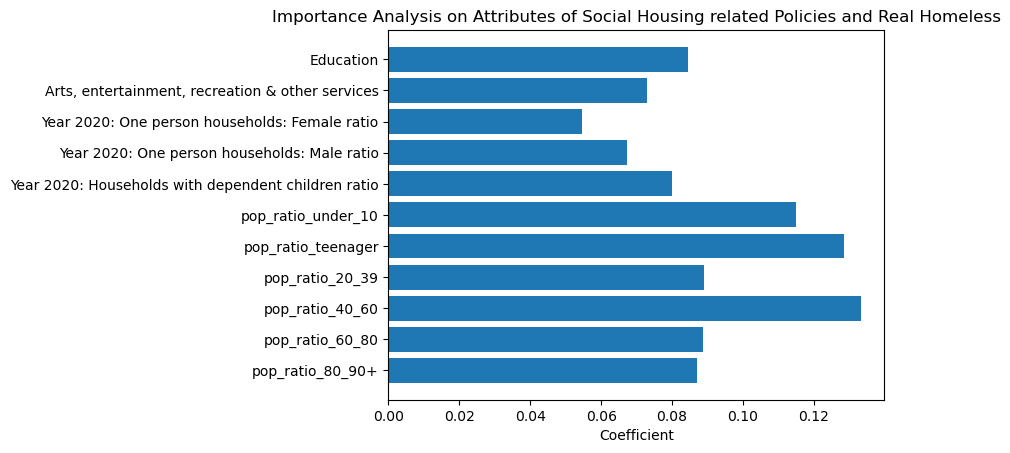

In [33]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
x_names = list(hundredYard_forest.feature_names_in_[:])
y_pos = np.arange(len(x_names))

ax.barh(y_pos, feature_importance_score, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y_pos)
ax.set_yticklabels(list(x_names))
ax.set_xlabel('Coefficient')
ax.set_title('Importance Analysis on Attributes of Social Housing related Policies and Real Homeless')
plt.savefig('Figure/random_forest_importance_score_analysis.png')
plt.show()

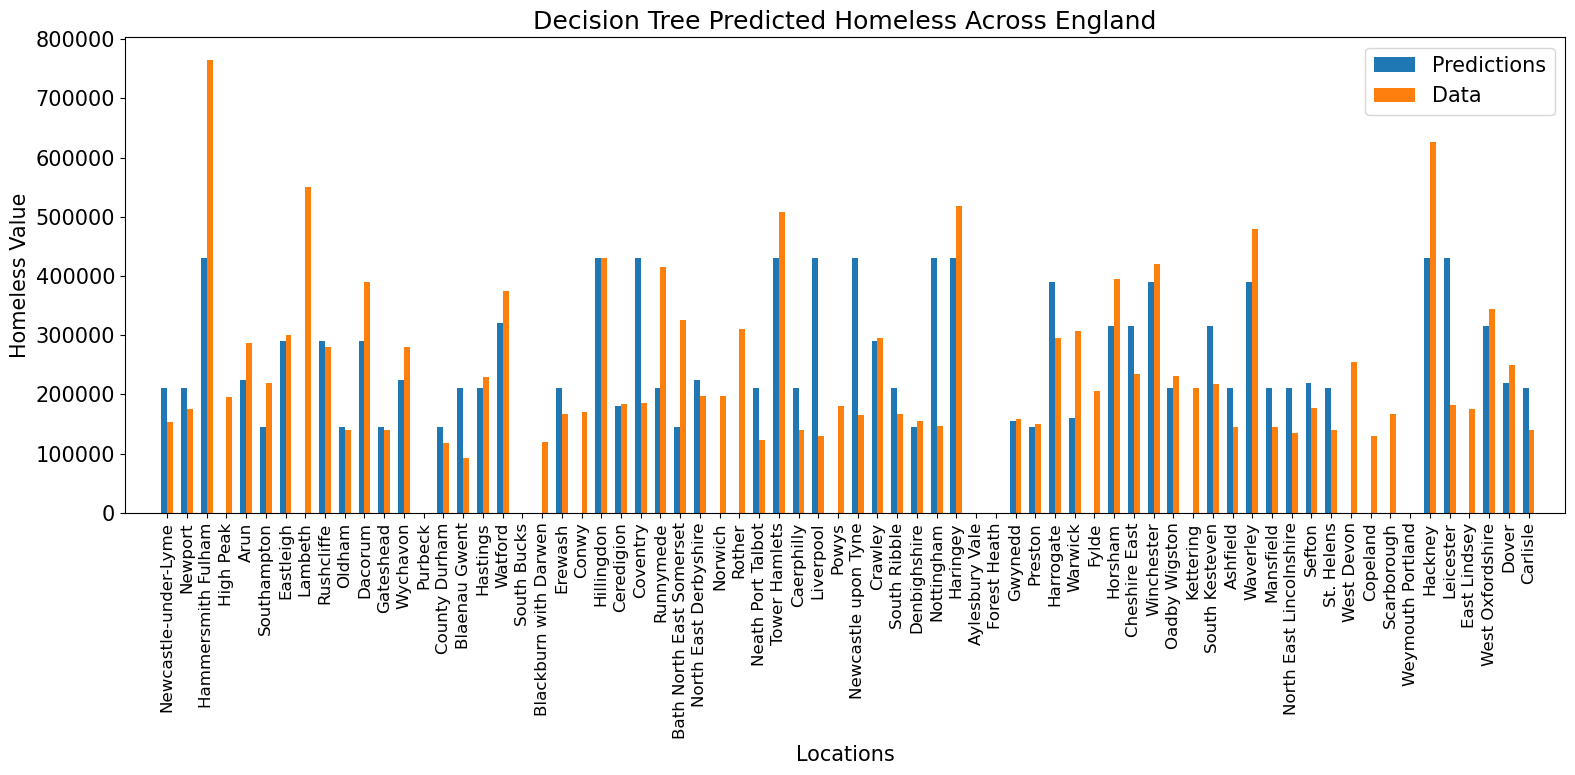

In [34]:
#Plot and save the test results
f_predictions = predictions
test_y = test_class_set

N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3

# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions, width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('Homeless Value')
plt.title('Decision Tree Predicted Homeless Across England')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[normal_test_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')

# Size of the Plot
plt.xlim([-2,max(y_pos)+2])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/Random_forest_test_result.png')
plt.show()